In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512, 4, 4)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
len(model.trainable_weights)

30

In [7]:
conv_base.trainable = False

In [8]:
len(model.trainable_weights)

4

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_dir = '/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/train'
validation_dir ='/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Epoch 1/30


KeyboardInterrupt: 

In [32]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [33]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [34]:
model.compile(loss='binary_crossentropy', 
             optimizer= optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/100
 - 18s - loss: 0.2867 - acc: 0.8725 - val_loss: 0.2248 - val_acc: 0.9120
Epoch 2/100
 - 17s - loss: 0.2606 - acc: 0.8905 - val_loss: 0.2133 - val_acc: 0.9140
Epoch 3/100
 - 17s - loss: 0.2293 - acc: 0.9015 - val_loss: 0.2191 - val_acc: 0.9090
Epoch 4/100
 - 17s - loss: 0.2264 - acc: 0.9030 - val_loss: 0.1946 - val_acc: 0.9260
Epoch 5/100
 - 17s - loss: 0.1974 - acc: 0.9240 - val_loss: 0.2105 - val_acc: 0.9180
Epoch 6/100
 - 17s - loss: 0.2000 - acc: 0.9240 - val_loss: 0.2088 - val_acc: 0.9170
Epoch 7/100
 - 17s - loss: 0.1764 - acc: 0.9290 - val_loss: 0.2000 - val_acc: 0.9200
Epoch 8/100
 - 17s - loss: 0.1732 - acc: 0.9270 - val_loss: 0.1928 - val_acc: 0.9260
Epoch 9/100
 - 17s - loss: 0.1635 - acc: 0.9370 - val_loss: 0.2052 - val_acc: 0.9240
Epoch 10/100
 - 17s - loss: 0.1621 - acc: 0.9335 - val_loss: 0.1887 - val_acc: 0.9210
Epoch 11/100
 - 17s - loss: 0.1381 - acc: 0.9415 - val_loss: 0.1888 - val_acc: 0.9270
Epoch 12/100
 - 17s - loss: 0.1358 - acc: 0.9460 - val_loss: 0.

Epoch 97/100
 - 17s - loss: 0.0167 - acc: 0.9925 - val_loss: 0.2953 - val_acc: 0.9370
Epoch 98/100
 - 17s - loss: 0.0162 - acc: 0.9935 - val_loss: 0.2878 - val_acc: 0.9340
Epoch 99/100
 - 17s - loss: 0.0145 - acc: 0.9930 - val_loss: 0.3249 - val_acc: 0.9400
Epoch 100/100
 - 17s - loss: 0.0220 - acc: 0.9915 - val_loss: 0.4674 - val_acc: 0.9200


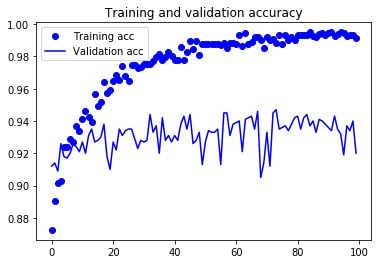

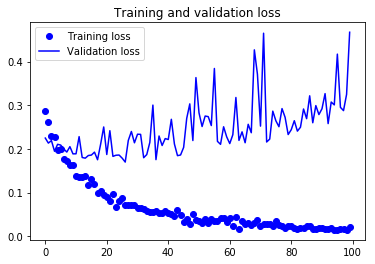

In [37]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

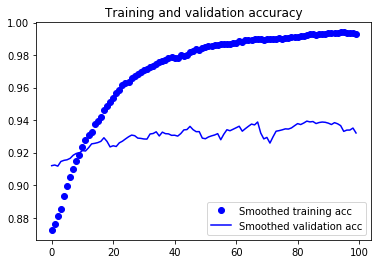

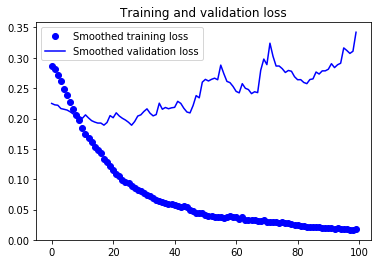

In [38]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
test_dir = '/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/test'

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
('test acc:', 0.9189999949932098)
